<a href="https://colab.research.google.com/github/alerodriguessf/Predicting-Churn-in-Streaming-Service/blob/main/Portfolio_Predicting_Churn_in_Streaming_Service_Logistic_Regression_20250117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Churn in Streaming Service using Logistic Regression


In [ ]:
# Import fundamental libraries for data analysis
!pip install ydata-profiling
!pip install --upgrade numba
!pip install sidetable

import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import sidetable
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [ ]:
# Upload the challenge file

from google.colab import files

uploaded = files.upload()

Saving streaming_data.xlsx to streaming_data (2).xlsx


## Step 01: Exploratory Data Analysis (Data Understanding)
1. Load the dataset;
2. Perform a statistical description of the data;
3. Check the data types;
4. Check the amount of missing values.


In [ ]:
# Load the main dataset

df = pd.read_excel('streaming_data (1).xlsx')

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


## Step 02: Data Preparation
1. Replace "NaN" values with 0 in specific columns;
2. Remove rows with null values in essential columns;
3. Map "churned" values to "No" and "Yes";
4. Convert float columns to integers.

In [ ]:
# Replace missing values with 0 in specific columns

columns_replace= ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[columns_replace] = df[columns_replace].fillna(0)

In [ ]:
# Remove rows with missing values in essential columns

df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [ ]:
# Transform "Churned" values from 0/1 to "No"/"Yes"

df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


df.head(10)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9
9,21.0,Female,112.0,2.0,Basic,0.0,3,2.57,Yes,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167
11,61.0,Male,5389.0,3.0,Standard,0.0,4,3.92,No,8f62edd7-4fe0-45c2-98b9-2951e4bef897
14,44.0,Male,4198.0,1.0,Basic,0.0,3,2.59,No,5417ca3a-b300-4429-b227-3bc75fbb2c1d
15,30.0,Male,2306.0,3.0,Premium,0.0,5,3.95,No,cc4de3a2-a732-42f1-b55d-6e33886a3b7d
20,20.0,Male,2542.0,5.0,Basic,0.0,1,0.00,Yes,b4da071a-c8b4-44dd-84fb-7de32abf766f


In [ ]:
# Convert float columns to integers

df['Age'] = df['Age'].astype(int)
df['Time_on_platform'] = df['Time_on_platform'].astype(int)
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)
df['Avg_rating'] = df['Avg_rating'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)

# Check dataset information after data preparation

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


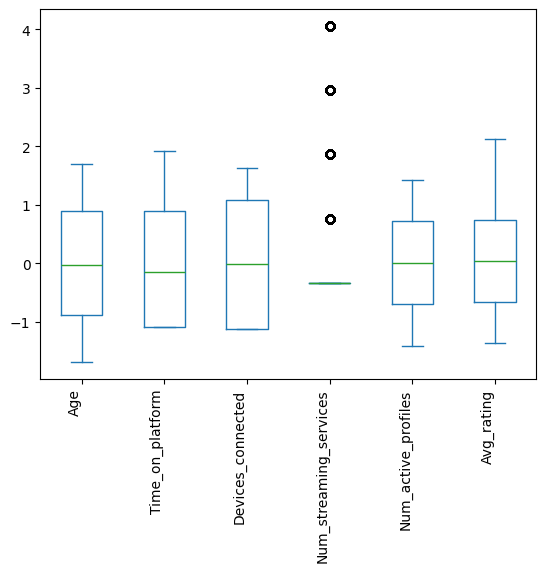

In [ ]:
# Explore possible outliers in the data using boxplot

from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')



df[numeric_cols].apply(scale).plot.box()

plt.xticks(rotation=90, ha='right');

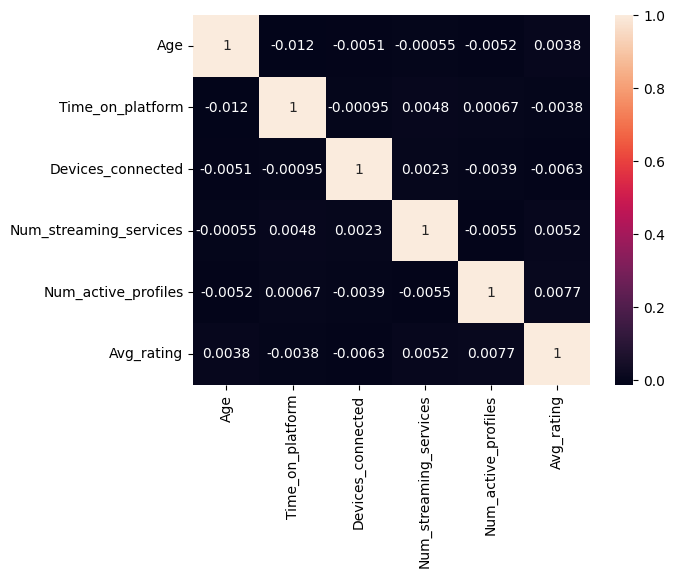

In [ ]:
# Analyse correlations between numerical variables
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True)

# Display the plot
plt.show()

## Step 03: Data Modelling - Logistic Regression
1. Define X (features) and y (target) variables;
2. Scale the data using MinMaxScaler;
3. Split the dataset into training and testing sets;
4. Fit the Logistic Regression model;
5. Evaluate the model using a confusion matrix and classification metrics.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# Define independent (X) and dependent (y) variables

x = df[['Age','Devices_connected','Time_on_platform','Num_streaming_services','Avg_rating']]
y = df['Churned'].replace({'No': 0, 'Yes': 1})

<ipython-input-20-acc6926af891>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Churned'].replace({'No': 0, 'Yes': 1})


In [ ]:
# Scale the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Fit Logistic Regression model

log_model = LogisticRegression(random_state = 42)
log_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89      5900
           1       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



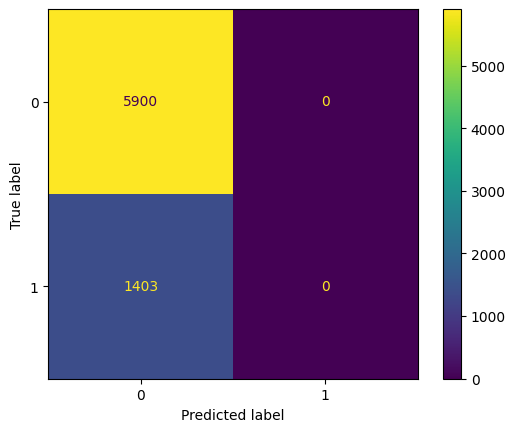

In [ ]:
# Make predictions

y_pred = log_model.predict(x_test)

# Display confusion matrix and classification report

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
disp.plot(cmap = 'viridis')

print(classification_report(y_test, y_pred))

## Step 04: Model Optimisation with Grid Search
1. Use GridSearchCV to find the best parameters;
2. Train the optimised model;
3. Evaluate the performance of the optimized model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression

param_grid = {
 'C':[0.1,1,10,100],
 'solver' : ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Best model found by Grid Search

best_model = grid_search.best_estimator_
print(f'best parameters: {grid_search.best_params_}')



best parameters: {'C': 0.1, 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.81      1.00      0.89      5900
           1       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


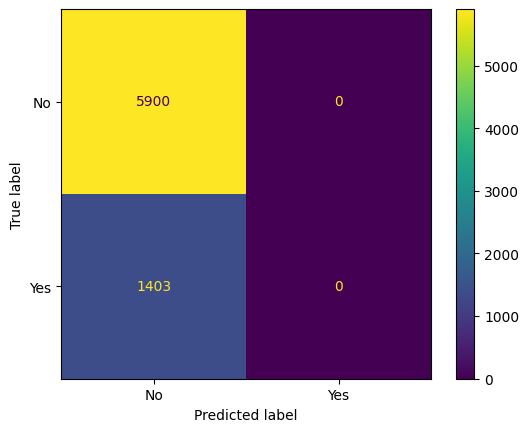

In [ ]:
# Evaluate optimised model

y_pred = best_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No','Yes'])
disp.plot(cmap = 'viridis')

print(classification_report(y_test, y_pred))

## Step 05: Modelling with Random Forest
1. Train a Random Forest model;
2. Optimise hyperparameters using Grid Search;
3. Evaluate the model with a confusion matrix and metrics.


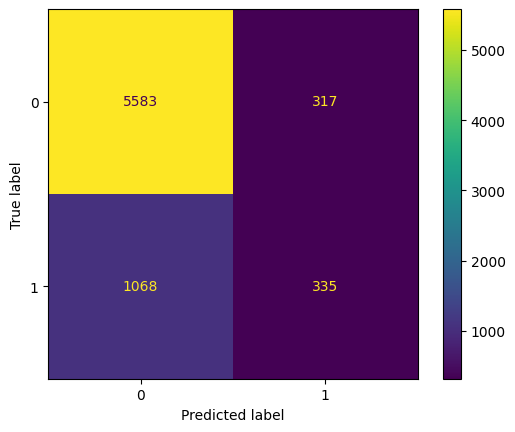

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5900
           1       0.51      0.24      0.33      1403

    accuracy                           0.81      7303
   macro avg       0.68      0.59      0.61      7303
weighted avg       0.78      0.81      0.78      7303



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(x_test)

# Display confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model,x_test, y_test)
plt.show()

# Display classification report for Random Forest
print(classification_report(y_test, y_pred_rf))


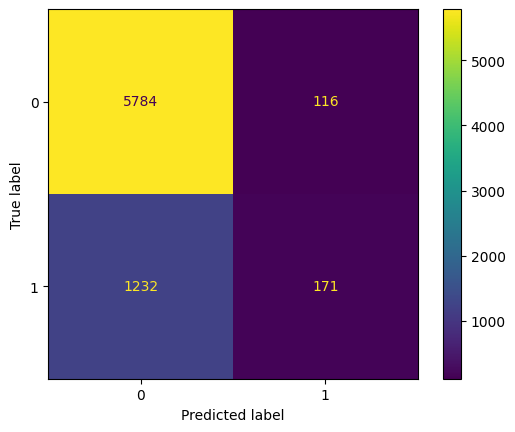

In [ ]:
# Optimise hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
rf_grid_search.fit(x_train, y_train)

# Best Random Forest model found by Grid Search

best_rf_model = rf_grid_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(x_test)

# Evaluate optimized model

ConfusionMatrixDisplay.from_estimator(best_rf_model, x_test, y=y_test)
plt.show()

In [ ]:
print("Best parameters:", rf_grid_search.best_params_)
print(classification_report(y_test, y_pred_best_rf))


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      5900
           1       0.60      0.12      0.20      1403

    accuracy                           0.82      7303
   macro avg       0.71      0.55      0.55      7303
weighted avg       0.78      0.82      0.76      7303



In [44]:
# Create a DataFrame for the user input
user_data = pd.DataFrame({
    'Age': [12],
    'Devices_connected': [4],
    'Time_on_platform': [1],
    'Num_streaming_services': [2],
    'Avg_rating': [1]
})

# Scale the user input data using the trained scaler
user_data_scaled = scaler.transform(user_data)

# Predict the probability of churn
churn_probability = best_model.predict_proba(user_data_scaled)[0][1]

# Display the result
print(f"The predicted probability of churn for this user is: {churn_probability:.3%}")



The predicted probability of churn for this user is: 20.539%
